In [1]:
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import hist
import vector
import os
import subprocess
import gc
import pandas as pd
from scipy.optimize import curve_fit
from scipy.integrate import quad
from scipy.interpolate import interp1d
print("uproot version", uproot.__version__)
print("awkward version", ak.__version__)
print("numpy version", np.__version__)
print("matplotlib version", matplotlib.__version__)
print("hist version", hist.__version__)
print("vector version", vector.__version__)
#print("os version", os.__version__)
#print("subprocess version", subprocess.__version__)
#print("gc version", gc.__version__)
print("pandas version", pd.__version__)
#print("scipy.optimize version", scipy.optimize.__version__)
#print("scipy.integrate version", scipy.integrate.__version__)

uproot version 5.0.12
awkward version 2.4.3
numpy version 1.25.2
matplotlib version 3.8.0
hist version 2.7.2
vector version 1.1.1
pandas version 1.5.3


In [2]:
X = [1.5099999999999998, 1.53, 1.55, 1.57, 1.59, 1.6099999999999999, 1.6300000000000001, 1.65, 1.67, 1.69, 1.71, 1.73, 1.75, 1.77, 1.79, 1.81, 1.83, 1.85, 1.87, 1.89, 1.9100000000000001, 1.93, 1.95, 1.97, 1.9900000000000002, 2.0100000000000002, 2.03, 2.05, 2.0700000000000003, 2.09, 2.1100000000000003, 2.13, 2.1500000000000004, 2.17, 2.19, 2.21, 2.23, 2.25, 2.27, 2.29, 2.3099999999999996, 2.33, 2.3499999999999996, 2.37, 2.39, 2.41, 2.43, 2.45, 2.4699999999999998, 2.49, 2.5100000000000002, 2.5300000000000002, 2.55, 2.57, 2.59, 2.61, 2.63, 2.65, 2.67, 2.69, 2.71, 2.73, 2.75, 2.7700000000000005, 2.79, 2.81, 2.83, 2.85, 2.87, 2.89, 2.91, 2.9299999999999997, 2.95, 2.97, 2.99, 3.01, 3.0300000000000002, 3.0500000000000003, 3.07, 3.09, 3.1100000000000003, 3.13, 3.1500000000000004, 3.17, 3.1900000000000004, 3.21, 3.2300000000000004, 3.25, 3.27, 3.29, 3.3099999999999996, 3.3300000000000005, 3.3499999999999996, 3.37, 3.39, 3.41, 3.43, 3.4499999999999997, 3.4699999999999998, 3.49, 3.51, 3.5300000000000002, 3.5500000000000003, 3.5700000000000003, 3.59, 3.61, 3.63, 3.6500000000000004, 3.67, 3.6899999999999995, 3.7100000000000004, 3.7299999999999995, 3.75, 3.77, 3.79, 3.8100000000000005, 3.8299999999999996, 3.8499999999999996, 3.87, 3.8899999999999997, 3.91, 3.93, 3.95, 3.9699999999999998, 3.9899999999999998, 4.01, 4.03, 4.05, 4.07, 4.09, 4.109999999999999, 4.13, 4.15, 4.17, 4.19, 4.21, 4.23, 4.25, 4.2700000000000005, 4.29, 4.31, 4.33, 4.35, 4.37, 4.390000000000001, 4.409999999999999, 4.43, 4.45, 4.47, 4.49, 4.51, 4.53, 4.550000000000001, 4.569999999999999, 4.59, 4.61, 4.63, 4.65, 4.67, 4.6899999999999995, 4.71, 4.7299999999999995, 4.75, 4.7700000000000005, 4.789999999999999, 4.8100000000000005, 4.83, 4.85, 4.87, 4.89, 4.91, 4.930000000000001, 4.95, 4.97, 4.99]

start = X[0] - (X[2] - X[1])/2
stop = X[-1] + (X[2] - X[1])/2
bins = len(X)

In [3]:
# eventsCuts: isCMUL == True
# tracksCuts: -4.0 < eta < -2.5; pt > 0.5; 2° < thetaAbs < 10°
# pairsCuts: -4.0 < rapidity < -2.5; 5 < pT < 6

Y_OS = [372.0, 397.0, 405.0, 416.0, 398.0, 403.0, 417.0, 388.0, 402.0, 335.0, 378.0, 421.0, 402.0, 370.0, 380.0, 375.0, 360.0, 369.0, 316.0, 361.0, 337.0, 362.0, 353.0, 331.0, 335.0, 365.0, 305.0, 345.0, 334.0, 342.0, 317.0, 293.0, 307.0, 300.0, 297.0, 326.0, 280.0, 291.0, 260.0, 266.0, 260.0, 254.0, 258.0, 291.0, 278.0, 272.0, 252.0, 249.0, 265.0, 255.0, 251.0, 254.0, 245.0, 225.0, 233.0, 214.0, 238.0, 240.0, 255.0, 248.0, 251.0, 274.0, 247.0, 234.0, 258.0, 234.0, 256.0, 288.0, 291.0, 356.0, 408.0, 418.0, 509.0, 580.0, 755.0, 920.0, 1097.0, 1349.0, 1460.0, 1582.0, 1498.0, 1422.0, 1212.0, 980.0, 725.0, 565.0, 388.0, 313.0, 270.0, 192.0, 198.0, 186.0, 165.0, 139.0, 139.0, 128.0, 128.0, 117.0, 114.0, 127.0, 142.0, 118.0, 135.0, 116.0, 140.0, 151.0, 138.0, 150.0, 164.0, 156.0, 161.0, 142.0, 139.0, 131.0, 109.0, 115.0, 114.0, 103.0, 99.0, 118.0, 94.0, 99.0, 96.0, 97.0, 107.0, 73.0, 89.0, 95.0, 83.0, 81.0, 71.0, 77.0, 82.0, 88.0, 80.0, 93.0, 77.0, 96.0, 83.0, 76.0, 64.0, 84.0, 78.0, 81.0, 78.0, 73.0, 85.0, 62.0, 81.0, 61.0, 53.0, 55.0, 65.0, 66.0, 60.0, 59.0, 65.0, 70.0, 59.0, 62.0, 78.0, 57.0, 64.0, 54.0, 66.0, 58.0, 50.0, 62.0, 65.0, 53.0, 48.0, 54.0, 59.0, 50.0, 60.0]

vMass_OS = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_OS.fill(X, weight = Y_OS)

Y_LS = [98.0, 101.0, 83.0, 80.0, 91.0, 97.0, 77.0, 84.0, 89.0, 84.0, 89.0, 79.0, 83.0, 76.0, 83.0, 92.0, 78.0, 78.0, 75.0, 80.0, 81.0, 90.0, 77.0, 79.0, 83.0, 76.0, 66.0, 72.0, 68.0, 74.0, 75.0, 80.0, 70.0, 77.0, 73.0, 66.0, 73.0, 79.0, 80.0, 80.0, 73.0, 68.0, 74.0, 69.0, 72.0, 81.0, 60.0, 72.0, 54.0, 75.0, 71.0, 70.0, 60.0, 73.0, 71.0, 64.0, 57.0, 63.0, 62.0, 67.0, 64.0, 66.0, 64.0, 79.0, 70.0, 71.0, 68.0, 56.0, 62.0, 79.0, 62.0, 60.0, 62.0, 56.0, 60.0, 74.0, 54.0, 67.0, 81.0, 63.0, 68.0, 70.0, 70.0, 62.0, 56.0, 70.0, 57.0, 44.0, 67.0, 62.0, 67.0, 73.0, 71.0, 65.0, 63.0, 77.0, 57.0, 47.0, 65.0, 62.0, 64.0, 80.0, 72.0, 71.0, 62.0, 78.0, 63.0, 72.0, 62.0, 65.0, 60.0, 59.0, 62.0, 59.0, 52.0, 57.0, 63.0, 52.0, 79.0, 62.0, 61.0, 58.0, 60.0, 68.0, 52.0, 46.0, 53.0, 50.0, 44.0, 61.0, 56.0, 51.0, 66.0, 55.0, 49.0, 43.0, 44.0, 41.0, 49.0, 48.0, 36.0, 38.0, 42.0, 47.0, 32.0, 40.0, 37.0, 56.0, 36.0, 42.0, 32.0, 36.0, 41.0, 34.0, 41.0, 29.0, 36.0, 32.0, 41.0, 24.0, 34.0, 30.0, 35.0, 34.0, 34.0, 37.0, 36.0, 34.0, 27.0, 33.0, 30.0, 28.0, 25.0, 28.0, 20.0]

vMass_LS = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_LS.fill(X, weight = Y_LS)

Y_JPsi = [6.0, 1.0, 3.0, 7.0, 0.0, 3.0, 2.0, 5.0, 5.0, 4.0, 5.0, 5.0, 4.0, 5.0, 8.0, 6.0, 5.0, 3.0, 4.0, 8.0, 2.0, 9.0, 3.0, 9.0, 9.0, 9.0, 15.0, 10.0, 12.0, 11.0, 10.0, 21.0, 15.0, 12.0, 19.0, 13.0, 20.0, 21.0, 19.0, 29.0, 16.0, 22.0, 32.0, 23.0, 30.0, 27.0, 36.0, 30.0, 39.0, 49.0, 45.0, 52.0, 59.0, 50.0, 61.0, 64.0, 83.0, 78.0, 83.0, 103.0, 119.0, 126.0, 155.0, 178.0, 190.0, 208.0, 288.0, 319.0, 348.0, 459.0, 551.0, 699.0, 861.0, 1121.0, 1483.0, 1880.0, 2661.0, 3408.0, 4178.0, 4868.0, 4852.0, 4506.0, 3578.0, 2572.0, 1631.0, 959.0, 539.0, 312.0, 164.0, 115.0, 82.0, 61.0, 51.0, 27.0, 19.0, 18.0, 11.0, 11.0, 13.0, 10.0, 10.0, 2.0, 5.0, 6.0, 6.0, 5.0, 6.0, 4.0, 2.0, 5.0, 3.0, 2.0, 2.0, 1.0, 5.0, 3.0, 2.0, 2.0, 1.0, 0.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 3.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 2.0, 0.0, 0.0, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

vMass_JPsi = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_JPsi.fill(X, weight = Y_JPsi)

Y_Psi = [2.0, 0.0, 2.0, 1.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 0.0, 1.0, 1.0, 3.0, 4.0, 2.0, 0.0, 0.0, 1.0, 2.0, 3.0, 0.0, 2.0, 5.0, 1.0, 1.0, 1.0, 1.0, 3.0, 5.0, 2.0, 2.0, 7.0, 1.0, 2.0, 2.0, 3.0, 1.0, 2.0, 1.0, 6.0, 4.0, 6.0, 5.0, 6.0, 6.0, 6.0, 3.0, 4.0, 6.0, 8.0, 8.0, 9.0, 6.0, 11.0, 14.0, 9.0, 13.0, 17.0, 10.0, 10.0, 14.0, 9.0, 18.0, 10.0, 10.0, 18.0, 18.0, 19.0, 10.0, 24.0, 27.0, 32.0, 29.0, 26.0, 29.0, 37.0, 41.0, 51.0, 44.0, 63.0, 52.0, 76.0, 85.0, 85.0, 101.0, 129.0, 134.0, 156.0, 150.0, 225.0, 246.0, 334.0, 411.0, 508.0, 576.0, 878.0, 1017.0, 1299.0, 1700.0, 1904.0, 2125.0, 2117.0, 1829.0, 1486.0, 1058.0, 686.0, 399.0, 262.0, 147.0, 75.0, 55.0, 48.0, 29.0, 16.0, 18.0, 8.0, 10.0, 11.0, 8.0, 6.0, 8.0, 7.0, 6.0, 1.0, 1.0, 2.0, 0.0, 1.0, 2.0, 3.0, 1.0, 0.0, 1.0, 1.0, 3.0, 0.0, 1.0, 1.0, 1.0, 0.0, 3.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0]

vMass_Psi = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_Psi.fill(X, weight = Y_Psi)

Y_MC = [8.0, 1.0, 5.0, 8.0, 2.0, 4.0, 3.0, 5.0, 5.0, 4.0, 5.0, 5.0, 5.0, 6.0, 9.0, 7.0, 7.0, 5.0, 4.0, 9.0, 3.0, 12.0, 7.0, 11.0, 9.0, 9.0, 16.0, 12.0, 15.0, 11.0, 12.0, 26.0, 16.0, 13.0, 20.0, 14.0, 23.0, 26.0, 21.0, 31.0, 23.0, 23.0, 34.0, 25.0, 33.0, 28.0, 38.0, 31.0, 45.0, 53.0, 51.0, 57.0, 65.0, 56.0, 67.0, 67.0, 87.0, 84.0, 91.0, 111.0, 128.0, 132.0, 166.0, 192.0, 199.0, 221.0, 305.0, 329.0, 358.0, 473.0, 560.0, 717.0, 871.0, 1131.0, 1501.0, 1898.0, 2680.0, 3418.0, 4202.0, 4895.0, 4884.0, 4535.0, 3604.0, 2601.0, 1668.0, 1000.0, 590.0, 356.0, 227.0, 167.0, 158.0, 146.0, 136.0, 128.0, 148.0, 152.0, 167.0, 161.0, 238.0, 256.0, 344.0, 413.0, 513.0, 582.0, 884.0, 1022.0, 1305.0, 1704.0, 1906.0, 2130.0, 2120.0, 1831.0, 1488.0, 1059.0, 691.0, 402.0, 264.0, 149.0, 76.0, 55.0, 49.0, 30.0, 17.0, 20.0, 9.0, 12.0, 13.0, 8.0, 7.0, 8.0, 7.0, 6.0, 1.0, 1.0, 2.0, 2.0, 1.0, 5.0, 4.0, 1.0, 1.0, 1.0, 1.0, 3.0, 0.0, 1.0, 1.0, 1.0, 0.0, 3.0, 0.0, 1.0, 1.0, 0.0, 2.0, 0.0, 1.0, 1.0, 0.0, 2.0, 0.0, 1.0, 2.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0]

vMass_MC = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_MC.fill(X, weight = Y_MC)

Hist(Regular(175, 1.5, 5, name='$m_{\\mu \\mu}$', label='X'), storage=Double()) # Sum: 66350.0

In [4]:
def CB2(x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )

    return np.piecewise(x, 
                        [( x - mu )/sig < -1 * alphaL, (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , ( x - mu )/sig > alphaR],
                        [lambda x: N * AL * (BL - (( x - mu )/sig))**(-nL), lambda x: N * np.exp(-1 * (( x - mu )/sig)**2 / 2), lambda x: N * AR * (BR + ( x - mu )/sig)**(-nR)])

def NA60(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R):
    return np.piecewise(x, 
                        [(x - mu)/sig < alphaL, 
                         ((x - mu)/sig >= alphaL) & ((x - mu)/sig <= alphaR).any() , 
                         (x - mu)/sig > alphaR],
                        [lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1L * (alphaL - (x - mu)/sig)**(p2L - p3L * np.sqrt(alphaL - (x - mu)/sig)))**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1R * ((x - mu)/sig - alphaR)**(p2R - p3R * np.sqrt((x - mu)/sig - alphaR)))**2)])

def VWG(x, N, mu, alpha, beta):
    sigma = alpha + beta*((x-mu)/mu)
    return N * np.exp(-(x - mu)**2 / (2*sigma**2))

def PR(x, N, a1, b1, b2):
    return N * (1 + a1*x) / (b1*x + b2*x)

def DE(x, N, alpha, beta1, beta2):
    return N * (np.exp(beta1*x) + alpha * np.exp(beta2*x))

def test(x, y1, y2, y3, y4, y5):
    x0 = [1.5, 2.5, 3.45, 3.8, 5]
    return interp1d([*x0], [y1, y2, y3, y4, y5], kind = 'cubic', bounds_error = False, fill_value = "extrapolate")(x)

def test2(x, y1, y2, y3, y4, y5):
    return np.exp(test(x, y1, y2, y3, y4, y5))

In [5]:
def fixedFunc_JPsi(x, N1, mu1, sig1):
    return func_JPsi(x, N1, mu1, sig1, alphaL1, nL1, alphaR1, nR1)

def fixedFunc_Psi(x, N2, mu2, sig2):
    return func_Psi(x, N2, mu2, sig2, alphaL2, nL2, alphaR2, nR2)

def fixedFunc_MC(x, N1, mu1, sig1, N2, mu2, sig2):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2)

def fixedFunc_bckg(x, y1, y2, y3, y4, y5):
    return func_bckg(x, y1, y2, y3, y4, y5)

def fixedFitFunc(x,
                 N1, mu1, sig1,
                 N2, mu2, sig2,
                y1, y2, y3, y4, y5):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2) + fixedFunc_bckg(x, y1, y2, y3, y4, y5)

condition_x_range = lambda x_data: (x_data < 5.0)
func_JPsi = CB2
func_Psi = CB2
func_bckg = test2
func_MC = fixedFunc_MC
func = fixedFitFunc

In [6]:
x_data = np.array(X)
y_data = np.array(vMass_JPsi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

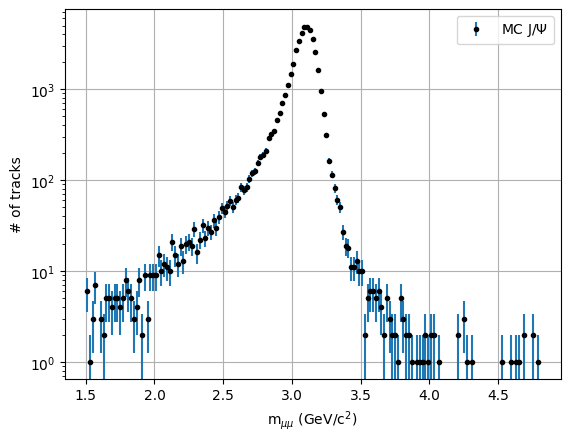

In [7]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [8]:
p0_JPsi = np.array([136241.85680339273, 3.1003675365856544, 0.0630318569252801, 0.993869592186634, 3.0340276033125493, 2.233482641523906, 2.705629560440874])

In [9]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_JPsi, pcov_JPsi, nfev_JPsi, fvec_JPsi, fjac_JPsi = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_JPsi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_JPsi))
print("pcov: \n", pcov_JPsi)
print("residual: \n", nfev_JPsi)

popt: 
 [4914.584213620926, 3.1005276644408584, 0.06119315256770447, 1.0344336749805865, 3.1321412999719067, 2.10479736169911, 2.8899013414631693]
pcov: 
 [[ 1.30153917e+03  4.46603567e-03 -1.10153225e-02 -7.56849505e-02
   8.57923503e-03 -3.19781058e-01  8.12453569e-01]
 [ 4.46603567e-03  2.63656870e-07 -1.39316784e-07 -5.33432916e-06
   1.56393361e-05 -1.70109709e-06  2.32757849e-07]
 [-1.10153225e-02 -1.39316784e-07  2.34043390e-07  5.06997850e-06
  -1.09925757e-05  8.97515322e-06 -2.12437754e-05]
 [-7.56849505e-02 -5.33432916e-06  5.06997850e-06  3.05768929e-04
  -1.19782196e-03  1.73721286e-04 -3.60476382e-04]
 [ 8.57923503e-03  1.56393361e-05 -1.09925757e-05 -1.19782196e-03
   6.78274237e-03 -3.15254499e-04  5.49062486e-04]
 [-3.19781058e-01 -1.70109709e-06  8.97515322e-06  1.73721286e-04
  -3.15254499e-04  2.38826165e-03 -9.58173700e-03]
 [ 8.12453569e-01  2.32757849e-07 -2.12437754e-05 -3.60476382e-04
   5.49062486e-04 -9.58173700e-03  5.04698538e-02]]
residual: 
 {'nfev': 9, '

fit error : 36.07768167164742


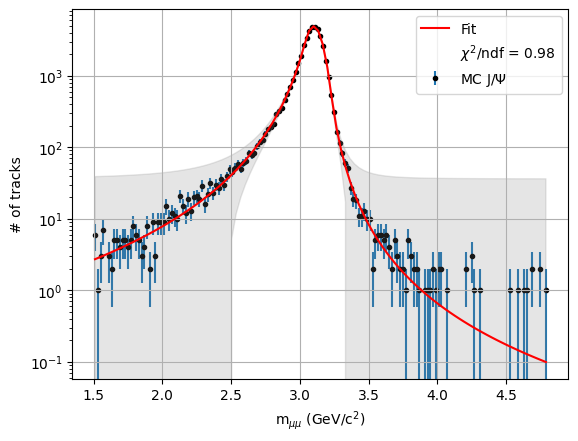

In [10]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_JPsi(x_fit, *popt_JPsi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_JPsi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_JPsi(x_data, *popt_JPsi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_JPsi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

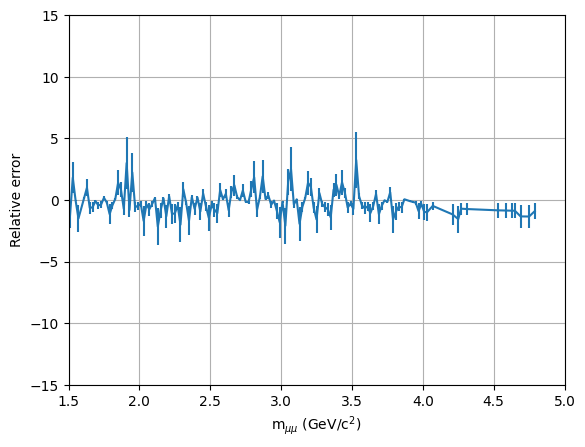

In [11]:
err = np.sqrt(nfev_JPsi["fvec"]**2/(nfev_JPsi["nfev"]-len(popt_JPsi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_JPsi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [12]:
x_data = np.array(X)
y_data = np.array(vMass_Psi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

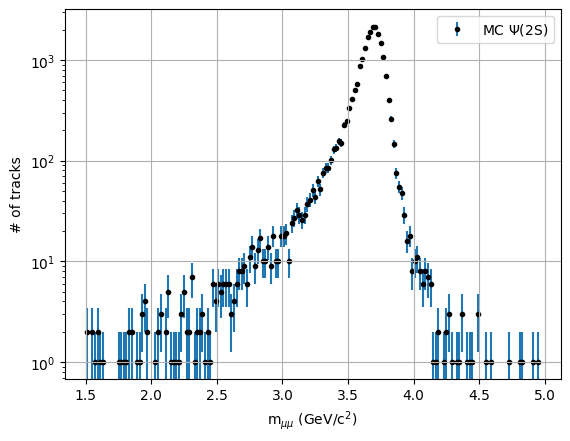

In [13]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [14]:
p0_Psi = np.array([67449.51297432544, 3.693248662583962, 0.06511527893660865, 0.9607870324016564, 2.849198115287005, 2.283717751711943, 2.5497581009488974])

In [15]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_Psi, pcov_Psi, nfev_Psi, fvec_Psi, fjac_Psi = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_Psi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_Psi))
print("pcov: \n", pcov_Psi)
print("residual: \n", nfev_Psi)

popt: 
 [2126.1058188217794, 3.693258199617258, 0.06530029268415431, 0.9688539799002078, 3.299884351206778, 2.08111259596318, 2.993297304775523]
pcov: 
 [[ 5.26015518e+02  4.66355769e-03 -1.13307114e-02 -6.51336576e-02
  -4.16958027e-02 -3.31146997e-01  9.34784381e-01]
 [ 4.66355769e-03  6.57097558e-07 -3.56381433e-07 -1.12163479e-05
   3.44650822e-05 -4.37685064e-06  1.31965187e-06]
 [-1.13307114e-02 -3.56381433e-07  6.02046006e-07  1.08995022e-05
  -2.34118465e-05  2.29268545e-05 -6.11231534e-05]
 [-6.51336576e-02 -1.12163479e-05  1.08995022e-05  5.42441626e-04
  -2.30432279e-03  3.72366336e-04 -8.80444490e-04]
 [-4.16958027e-02  3.44650822e-05 -2.34118465e-05 -2.30432279e-03
   1.47052444e-02 -6.49016570e-04  1.24647360e-03]
 [-3.31146997e-01 -4.37685064e-06  2.29268545e-05  3.72366336e-04
  -6.49016570e-04  5.59779912e-03 -2.51469185e-02]
 [ 9.34784381e-01  1.31965187e-06 -6.11231534e-05 -8.80444490e-04
   1.24647360e-03 -2.51469185e-02  1.47496893e-01]]
residual: 
 {'nfev': 11, 'f

fit error : 22.938697903553322


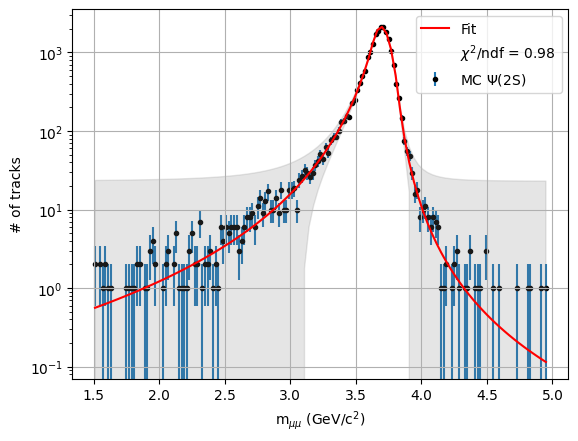

In [16]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_Psi(x_fit, *popt_Psi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_Psi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_Psi(x_data, *popt_Psi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_Psi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

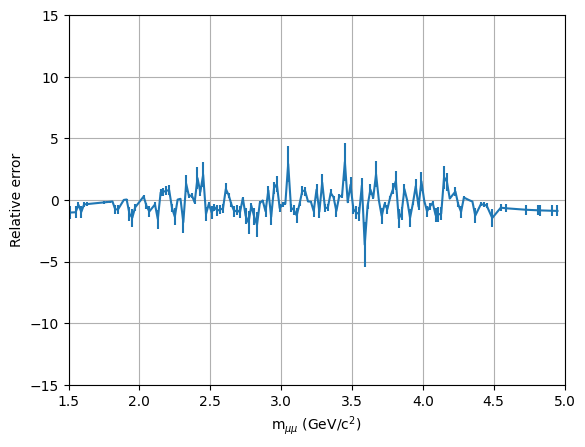

In [17]:
err = np.sqrt(nfev_Psi["fvec"]**2/(nfev_Psi["nfev"]-len(popt_Psi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_Psi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [18]:
x_data = np.array(X)
y_data = np.array(vMass_MC)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

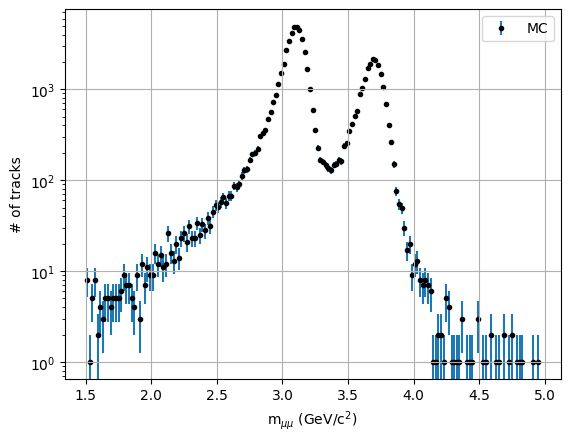

In [19]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [20]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
nL1 = popt_JPsi[4]
alphaR1= popt_JPsi[5]
nR1 = popt_JPsi[6]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
nL2 = popt_Psi[4]
alphaR2 = popt_Psi[5]
nR2 = popt_Psi[6]

p0_MC = np.array([N1, mu1, sig1, N2, mu2, sig2])

In [21]:
def mklb(p0, var):
    return p0*(1-np.sign(p0)*var)

def mkub(p0, var):
    return p0*(1+np.sign(p0)*var)

varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0_MC[:3],varpks), *mklb(p0_MC[3:6],varpks)])
ub = np.array([*mkub(p0_MC[:3],varpks), *mkub(p0_MC[3:6],varpks)])
bounds = (lb,ub)

In [22]:
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, method = 'trf', full_output = True)
popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_MC))
print("pcov: \n", pcov_MC)
print("residual: \n", nfev_MC)

popt: 
 [4910.245208859594, 3.100460022514782, 0.06133874883907612, 2126.7107766145973, 3.6932707298195555, 0.06533297576831285]
pcov: 
 [[ 1.31616736e+03  2.81419778e-03 -8.85936307e-03 -5.12309897e+00
  -3.15252724e-04  4.41345920e-04]
 [ 2.81419778e-03  1.69620168e-07 -3.48442862e-08  2.34439666e-05
   2.37669553e-09 -2.47540652e-09]
 [-8.85936307e-03 -3.48442862e-08  1.15670338e-07  2.22648316e-04
   1.10630954e-08 -1.68201646e-08]
 [-5.12309897e+00  2.34439666e-05  2.22648316e-04  5.33633132e+02
   3.38005608e-03 -9.14508045e-03]
 [-3.15252724e-04  2.37669553e-09  1.10630954e-08  3.38005608e-03
   4.34019518e-07 -1.19267783e-07]
 [ 4.41345920e-04 -2.47540652e-09 -1.68201646e-08 -9.14508045e-03
  -1.19267783e-07  3.06363750e-07]]
residual: 
 {'nfev': 4, 'fvec': array([-1.66281004,  2.41547372, -0.65301213, -1.53079624,  1.27784991,
       -0.02453951,  0.6362377 , -0.3305587 , -0.25581283,  0.30197712,
       -0.09420668, -0.00679546,  0.08542662, -0.24137954, -1.12040301,
       -

fit error : 43.009307075945664


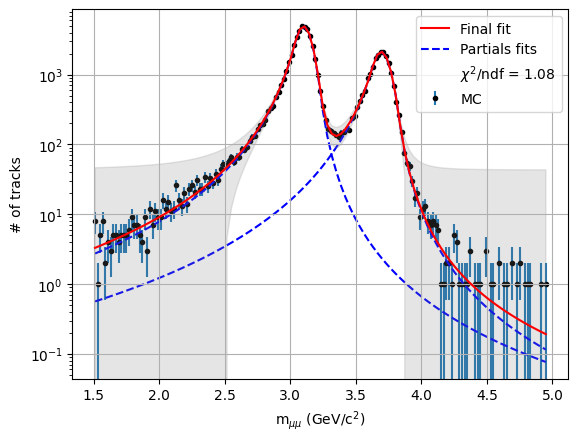

In [23]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_MC(x_fit, *popt_MC)
plt.plot(x_fit, y_fit, '-r', label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt_MC[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt_MC[3:6]), '--b', zorder = 1)

sigmas = np.diag(pcov_MC)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_MC(x_data, *popt_MC)) / y_error) ** 2)
ndf = len(x_data) + len(popt_MC) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

/tmp/ipykernel_13827/4254452161.py:1: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))


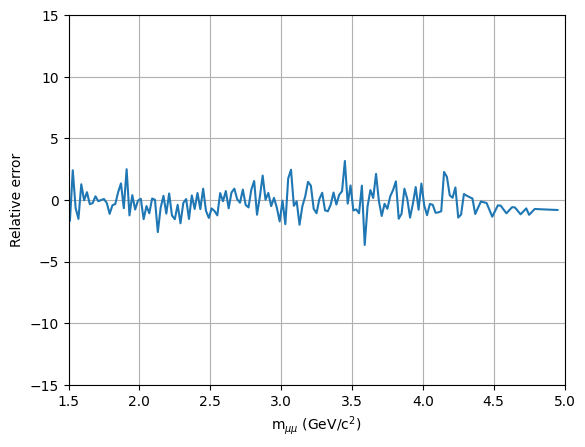

In [24]:
err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_MC["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [25]:
x_data = np.array(X)
y_data = np.array(vMass_LS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

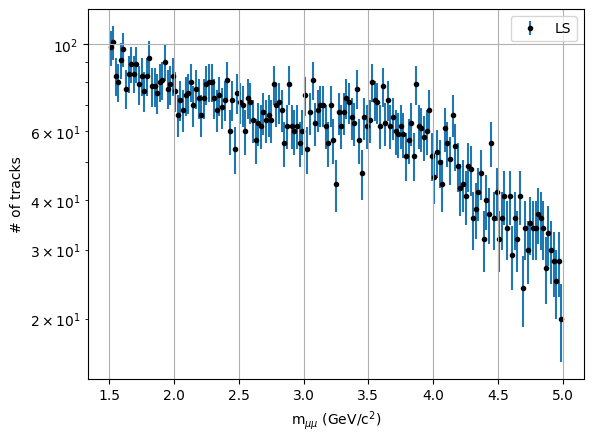

In [26]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [27]:
p0_bckg = np.array([1,1,1,1,1])

In [28]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_bckg, pcov_bckg, nfev_bckg, fvec_bckg, fjac_bckg = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_bckg, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_bckg))
print("pcov: \n", pcov_bckg)
print("residual: \n", nfev_bckg)

popt: 
 [4.559504302543054, 4.221946252160628, 4.147063600073262, 4.060574579364742, 3.188994874943941]
pcov: 
 [[ 1.18241499e-03 -2.14238807e-04  1.54483122e-04  8.27000963e-05
   2.80678026e-04]
 [-2.14238807e-04  2.43298625e-04  4.32332573e-06 -2.50997907e-05
  -1.56178755e-05]
 [ 1.54483122e-04  4.32332573e-06  2.88982093e-04  1.99734448e-04
   1.05334126e-04]
 [ 8.27000963e-05 -2.50997907e-05  1.99734448e-04  2.62328252e-04
  -3.05440416e-04]
 [ 2.80678026e-04 -1.56178755e-05  1.05334126e-04 -3.05440416e-04
   3.92707877e-03]]
residual: 
 {'nfev': 14, 'fvec': array([-0.31550634, -0.73654351,  1.02856461,  1.25142341, -0.09822014,
       -0.81444212,  1.24652012,  0.32075831, -0.31991605,  0.11597846,
       -0.51076757,  0.48782612, -0.05213916,  0.65927334, -0.21931878,
       -1.22113424,  0.18143722,  0.10713255,  0.38307386, -0.25542105,
       -0.42900183, -1.41383298, -0.10721329, -0.38768997, -0.87030321,
       -0.15950347,  1.00545161,  0.20588079,  0.64813393, -0.1208148

fit error : 0.07683815933769038


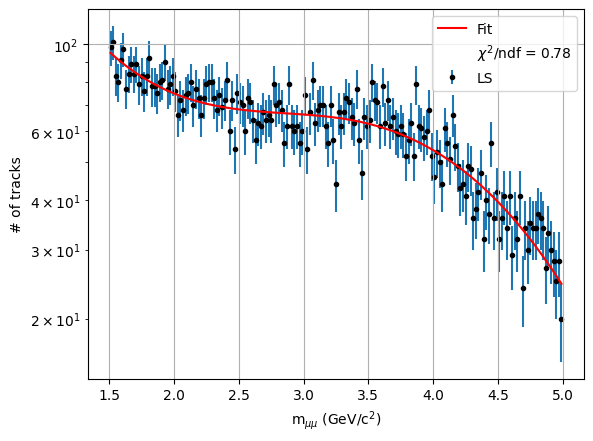

In [29]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_bckg(x_fit, *popt_bckg)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_bckg)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_bckg(x_data, *popt_bckg)) / y_error) ** 2)
ndf = len(x_data) + len(popt_bckg) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

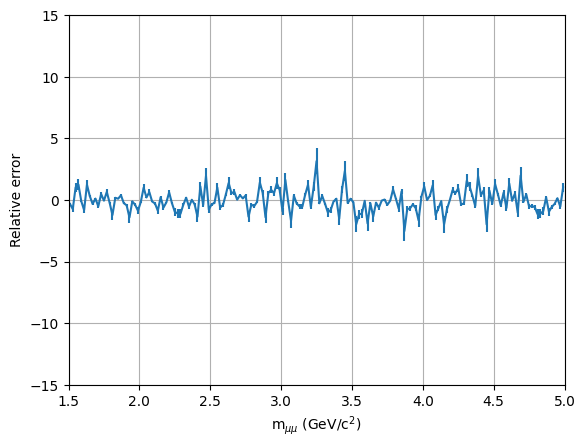

In [30]:
err = np.sqrt(nfev_bckg["fvec"]**2/(nfev_bckg["nfev"]-len(popt_bckg)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_bckg["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [31]:
x_data = np.array(X)
y_data = np.array(vMass_OS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

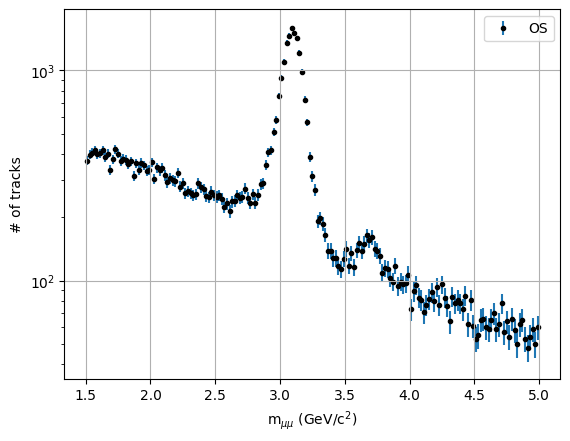

In [32]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [33]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
nL1 = popt_JPsi[4]
alphaR1 = popt_JPsi[5]
nR1 = popt_JPsi[6]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
nL2 = popt_Psi[4]
alphaR2 = popt_Psi[5]
nR2 = popt_Psi[6]

y1 = popt_bckg[0]
y2 = popt_bckg[1]
y3 = popt_bckg[2]
y4 = popt_bckg[3]
y5 = popt_bckg[4]

p0 = np.array([N1, mu1, sig1, N2, mu2, sig2,  y1, y2, y3, y4, y5])

In [34]:
varbg = np.ones(np.shape(p0[6:]))*1# bg parameters variation factor around p0
varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0[:3],varpks), *mklb(p0[3:6],varpks), *mklb(p0[6:],varbg)])
ub = np.array([*mkub(p0[:3],varpks), *mkub(p0[3:6],varpks), *mkub(p0[6:],varbg)])
bounds = (lb,ub)

In [35]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, method = 'trf', full_output = True)
popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt))
print("pcov: \n", pcov)
print("residual: \n", nfev)

popt: 
 [1475.4355831436924, 3.0974379796248646, 0.0673124678244749, 50.60221864276318, 3.692634989477436, 0.06749070318088064, 6.0269196649227545, 5.464673045916848, 4.8098023137940915, 4.606205206024177, 3.937789876991826]
pcov: 
 [[ 5.03795223e+02  3.29422724e-03 -1.41305953e-02  9.94154738e-01
  -3.56246821e-03  7.44083148e-03 -1.10364941e-02  2.50338304e-03
  -2.15592392e-02 -1.39391867e-02 -1.17476260e-02]
 [ 3.29422724e-03  1.05191596e-06 -3.04183293e-07 -1.09741034e-04
   3.83626729e-07 -8.09544150e-07 -1.78235351e-07  2.14988429e-06
   3.32283131e-06  1.69969587e-06  2.20481796e-06]
 [-1.41305953e-02 -3.04183293e-07  1.19492651e-06  8.30706085e-04
  -1.16092840e-06  2.77998216e-06 -2.47565768e-06 -6.05717429e-06
  -1.52057567e-05 -9.23985541e-06 -7.15526566e-06]
 [ 9.94154738e-01 -1.09741034e-04  8.30706085e-04  6.03705610e+01
   6.98302249e-03 -4.76860223e-02 -1.27938859e-02 -8.53151979e-03
  -4.70018133e-02 -3.94772503e-02  8.16186800e-03]
 [-3.56246821e-03  3.83626729e-07 -

fit error : 23.752302239797118


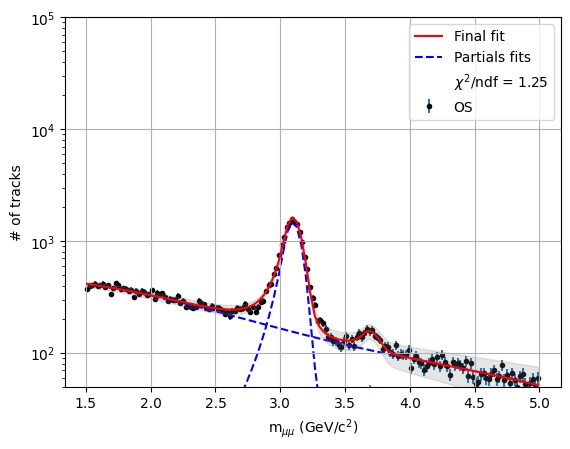

In [36]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func(x_fit, *popt)
plt.plot(x_fit, y_fit, '-r', zorder = 2, label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt[3:6]), '--b', zorder = 1)
plt.plot(x_fit, fixedFunc_bckg(x_fit, *popt[6:]), '--b', zorder = 1)

sigmas = np.absolute(np.diag(pcov))
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func(x_data, *popt)) / y_error) ** 2)
ndf = len(x_data) + len(popt) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.legend()
plt.yscale('log')
plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.ylim(50, 100000)
plt.grid(True)

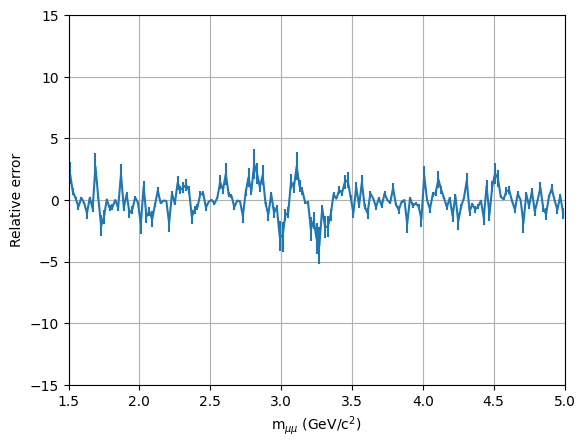

In [37]:
err = np.sqrt(nfev["fvec"]**2/(nfev["nfev"]-len(popt)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [38]:
def dCB2(pcov, x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )
    
    def dCB2dx(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: AL*N*nL/(sig*(BL - (-mu + x)/sig)*(BL - (-mu + x)/sig)**nL), 
                             lambda x: -N*(-2*mu + 2*x)*np.exp(-(-mu + x)**2/(2*sig**2))/(2*sig**2), 
                             lambda x: -AR*N*nR/(sig*(BR + (-mu + x)/sig)*(BR + (-mu + x)/sig)**nR)])
    
    def dCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: AL/(BL - (-mu + x)/sig)**nL, 
                             lambda x: np.exp(-(-mu + x)**2/(2*sig**2)), 
                             lambda x: AR/(BR + (-mu + x)/sig)**nR])

    def dCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: -AL*N*nL/(sig*(BL - (-mu + x)/sig)*(BL - (-mu + x)/sig)**nL), 
                             lambda x: -N*(2*mu - 2*x)*np.exp(-(-mu + x)**2/(2*sig**2))/(2*sig**2), 
                             lambda x: AR*N*nR/(sig*(BR + (-mu + x)/sig)*(BR + (-mu + x)/sig)**nR)])

    def dCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: -AL*N*nL*(-mu + x)/(sig**2*(BL - (-mu + x)/sig)*(BL - (-mu + x)/sig)**nL), 
                             lambda x: N*(-mu + x)**2*np.exp(-(-mu + x)**2/(2*sig**2))/sig**3, 
                             lambda x: AR*N*nR*(-mu + x)/(sig**2*(BR + (-mu + x)/sig)*(BR + (-mu + x)/sig)**nR)])
    
    def IdCB2dx(x, *args):
        return quad(dCB2dx, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdCB2dN(x, *args):
        return quad(dCB2dN, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdCB2dmu(x, *args):
        return quad(dCB2dmu, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdCB2dsig(x, *args):
        return quad(dCB2dsig, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    return np.sqrt(IdCB2dx(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * (((stop - start)/bins)/2)**2 \
                   + IdCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[0, 0] \
                   + IdCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[1, 1] \
                   + IdCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[2, 2] \
                   + 2 * IdCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR) * IdCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(np.abs(pcov[0, 1])) \
                   + 2 * IdCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR) * IdCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(np.abs(pcov[1, 2])) \
                   + 2 * IdCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR) * IdCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(np.abs(pcov[2, 1])))

N_JPsi = quad(fixedFunc_JPsi, start, stop, args = (*popt[:3], ))[0] / ((stop - start)/bins)
err_JPsi = dCB2(pcov[:3, :3], x_data, *popt[:3], *popt_JPsi[3:])
print(r"N_JPsi = ", N_JPsi, " +/- ", err_JPsi, "(stat.)")

N_JPsi =  14833.914579456401  +/-  351.08188253302365 (stat.)
